In [21]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import sys

width  = 340
height = 243

dataset_path = 'D:/Academia/Sem2/Advance Stats/t/'
dataset_dir  = os.listdir(dataset_path)


Train Images:


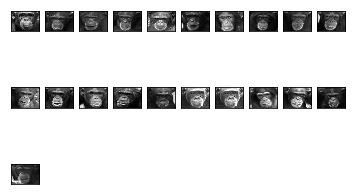

array([[0.32481176, 0.2581451 , 0.23853725, ..., 0.23751843, 0.31202824,
        0.3669302 ],
       [0.62119137, 0.60942667, 0.59822745, ..., 0.20788784, 0.21965255,
        0.24710353],
       [0.78647843, 0.76294902, 0.7158902 , ..., 0.25575725, 0.24007098,
        0.29105137],
       ...,
       [0.41041765, 0.3908098 , 0.3908098 , ..., 0.91825412, 0.95354824,
        0.9630502 ],
       [0.25967882, 0.24007098, 0.24007098, ..., 0.08821608, 0.09998078,
        0.12743176],
       [0.44547451, 0.41410196, 0.38272941, ..., 0.23134196, 0.23526353,
        0.25487137]])

In [60]:
print('Train Images:')
train_image_names = ['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg','10.jpg','11.jpg','12.jpg','13.jpg','14.jpg','15.jpg','16.jpg','16.jpg','17.jpg','18.jpg','19.jpg','20.jpg']
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = io.imread(dataset_path + train_image_names[i], as_gray = True)
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,10,1+i)
    plt.imshow(img, cmap = 'gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()
training_tensor

Test Images:


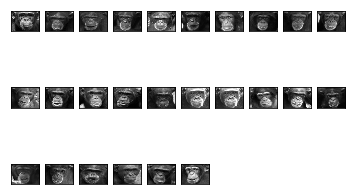

In [55]:
print('Test Images:')
test_image_names = ['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg','10.jpg','11.jpg','12.jpg','13.jpg','14.jpg','15.jpg','16.jpg','16.jpg','17.jpg','18.jpg','19.jpg','20.jpg','21.jpg','22.jpg','23.jpg','24.jpg','25.jpg']
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = io.imread(dataset_path + test_image_names[i], as_gray = True)
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,10,1+i)
    plt.imshow(img, cmap = 'gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

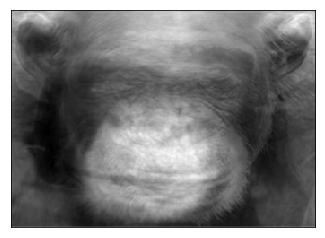

In [61]:
#Mean faces 
#mean_face = np.zeros((1,len(train_image_names)))

#for i in training_tensor:
    #mean_face = np.add(mean_face,i)

#mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()
mean_face = np.mean(training_tensor,0)
plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()


In [62]:
#normalized faces
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

#subtract mean
for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

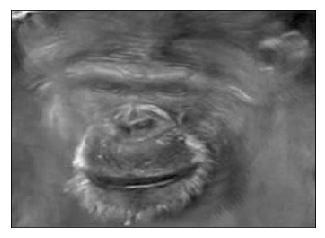

In [58]:
#display normalized faces
#for i in range(len(train_image_names)):
img = normalised_training_tensor[2].reshape(height,width)
    #plt.subplot(2,4,1+i)
plt.imshow(img, cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [63]:
#covariance matrix
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 4.21871700e-03 -5.24606563e-04 -2.91830591e-04 -6.75369880e-04
  -7.02891125e-04  1.87236793e-05 -8.23069500e-04 -4.84960883e-04
  -2.34947078e-04 -1.02727015e-04 -5.38908278e-04 -4.25850744e-04
   5.01641468e-04 -9.99923822e-05  1.30374310e-04  8.93373095e-04
   8.93373095e-04 -5.15050925e-05 -7.75438829e-04 -1.95836346e-04
  -7.28268339e-04]
 [-5.24606563e-04  1.28529961e-03  2.65998027e-04  5.42830681e-04
   4.63728339e-04  6.19994973e-04  5.38820537e-04  4.04823370e-04
  -6.25434948e-05  2.31468606e-05 -7.24513845e-04  2.87342889e-04
  -7.76781286e-04  8.25578610e-04 -4.11530946e-04 -1.25428186e-03
  -1.25428186e-03 -5.88129796e-04 -3.24993131e-04  5.59459686e-05
   6.08152918e-04]
 [-2.91830591e-04  2.65998027e-04  1.00019495e-03  5.14153855e-04
   2.97689879e-05  2.40424982e-04  4.79599433e-04  1.04788568e-04
   6.02642809e-05 -1.72286935e-04 -6.86603608e-05  3.67009684e-05
  -3.69426559e-04  1.37753107e-04 -4.76234024e-05 -8.67758050e-04
  -8.67758050

In [64]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 1.10723020e-01  1.86442631e-01 -2.92666605e-01  1.55358986e-01
   6.11591651e-01 -1.60386286e-01  4.27270167e-01  4.06443262e-01
  -5.86080032e-02 -1.42984472e-01 -3.08604601e-02  5.48539718e-02
  -1.27048852e-01  2.57392206e-03  2.68530996e-02 -4.75382993e-02
   3.22036227e-02  5.11810878e-03 -3.64122225e-03 -2.18217852e-01
   2.20781890e-06]
 [-1.45717033e-01  2.90232258e-02  4.13717438e-02 -7.65819575e-02
   3.75437978e-02 -3.78634825e-02 -1.02258849e-01 -1.03586969e-01
   1.38291547e-01 -1.52678215e-01 -3.70652243e-02  1.72772065e-01
   1.04098644e-01 -1.76563635e-01  2.28915216e-01  6.91439803e-03
   8.54315212e-01 -2.67611383e-02 -2.71024692e-03 -2.18217852e-01
   2.20781890e-06]
 [-8.10904129e-02 -3.77204332e-02 -5.20348029e-02 -1.36032101e-01
  -6.50487403e-02 -6.40747648e-02 -2.55025614e-02  5.78338760e-02
   4.16006279e-02 -1.81288982e-01  1.88610301e-02  1.58099094e-01
   5.36813081e-02  1.28922063e-02  3.19937200e-01  6.68315474e-01
  -2.43437980

In [31]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

Cumulative proportion of variance explained vector: 
[0.27883775 0.40609795 0.50872355 0.5795315  0.6409821  0.69768162
 0.74586206 0.79196085 0.8297099  0.8618724  0.887277   0.90882334
 0.92897175 0.9468586  0.96111859 0.97403931 0.98404636 0.99261918
 1.         1.         1.        ]


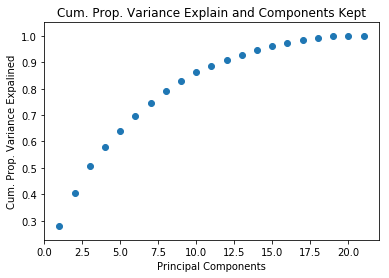

In [32]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [33]:
reduced_data = np.array(eigvectors_sort[:10]).transpose()

In [34]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()
proj_data

array([[-0.24925415, -0.28498824, -0.31046773, ...,  0.17537451,
         0.16617669,  0.13611752],
       [ 0.01443234,  0.00464273,  0.03646485, ..., -0.23865473,
        -0.26242398, -0.27970357],
       [-0.09369849, -0.09068868, -0.06793392, ...,  0.51948072,
         0.52326193,  0.48890976],
       ...,
       [-0.23903453, -0.26408836, -0.29770502, ..., -0.05278013,
        -0.02818822, -0.02258304],
       [ 0.09495434,  0.07735398,  0.06948362, ..., -0.09718591,
        -0.12855496, -0.14203083],
       [ 0.1697517 ,  0.18904405,  0.19274233, ...,  0.06116314,
         0.03472861,  0.06723639]])

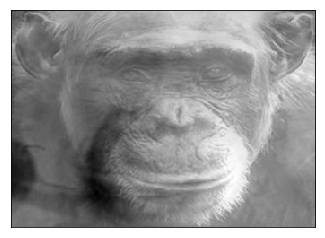

In [35]:
#first eigen vector
#for i in range(proj_data.shape[0]):
img = proj_data[0].reshape(height,width)
    #plt.subplot(2,5,1+i)
plt.imshow(img, cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

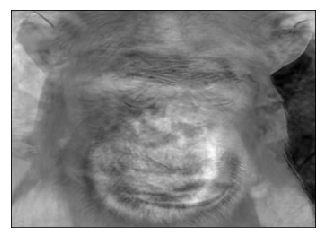

In [44]:
#second eigen vector
img = proj_data[3].reshape(height,width)
    #plt.subplot(2,5,1+i)
plt.imshow(img, cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [37]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w

array([[ 1.87244068e+03,  1.12230305e+03, -1.26523441e+03,
         7.23534758e+02,  1.64906827e+03, -1.66059270e+02,
         1.10608613e+03,  9.33411355e+02, -3.61488806e+01,
        -1.36597653e+02],
       [-3.74795007e+03,  5.51405746e+01, -3.08297351e+02,
        -1.15335875e+03,  4.61800962e+02, -1.15926076e+03,
        -8.80768863e+02, -5.08532932e+02, -3.48448328e+01,
        -5.42657046e+02],
       [-2.43753884e+03, -3.07284569e+02, -6.21669031e+02,
        -1.11665779e+03,  8.00616427e+01, -9.56750645e+02,
        -5.43060749e+02, -9.15047695e+01, -1.32757868e+02,
        -5.04294502e+02],
       [-4.24653642e+03,  9.80085876e+01, -3.65744999e+02,
        -1.27956010e+03, -8.86297230e+01, -1.05803041e+03,
        -5.66936428e+02, -4.89065330e+01, -7.35327954e+01,
        -4.77320309e+02],
       [-3.36850522e+02, -7.99000597e+02,  9.72734958e+02,
         2.14788908e+03, -1.91469565e+02,  2.93979032e+03,
         1.19621466e+03,  3.55814473e+02,  1.26996306e+03,
         7.

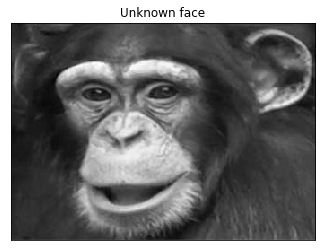

In [65]:
#unknown faces

unknown_face        = io.imread(dataset_path + '25.jpg', as_gray = True)
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

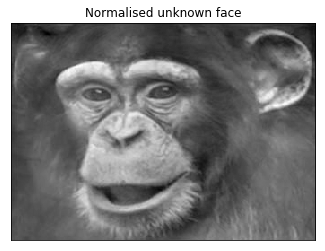

In [66]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [67]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)
min(norms)

[ 8222.0105769  12821.09269034 11711.54482157 12972.17169705
  7181.83352756 13730.95700395  8533.07017748 12272.30058633
 11668.05138648  9961.31218814  6822.06289639 10587.29629706
  6620.76103406 11915.68356072 10067.6482975   5234.48946262
  5234.48946262  7653.62051345  5515.93858156 12112.17399989
 13434.63552393]


5234.489462622342

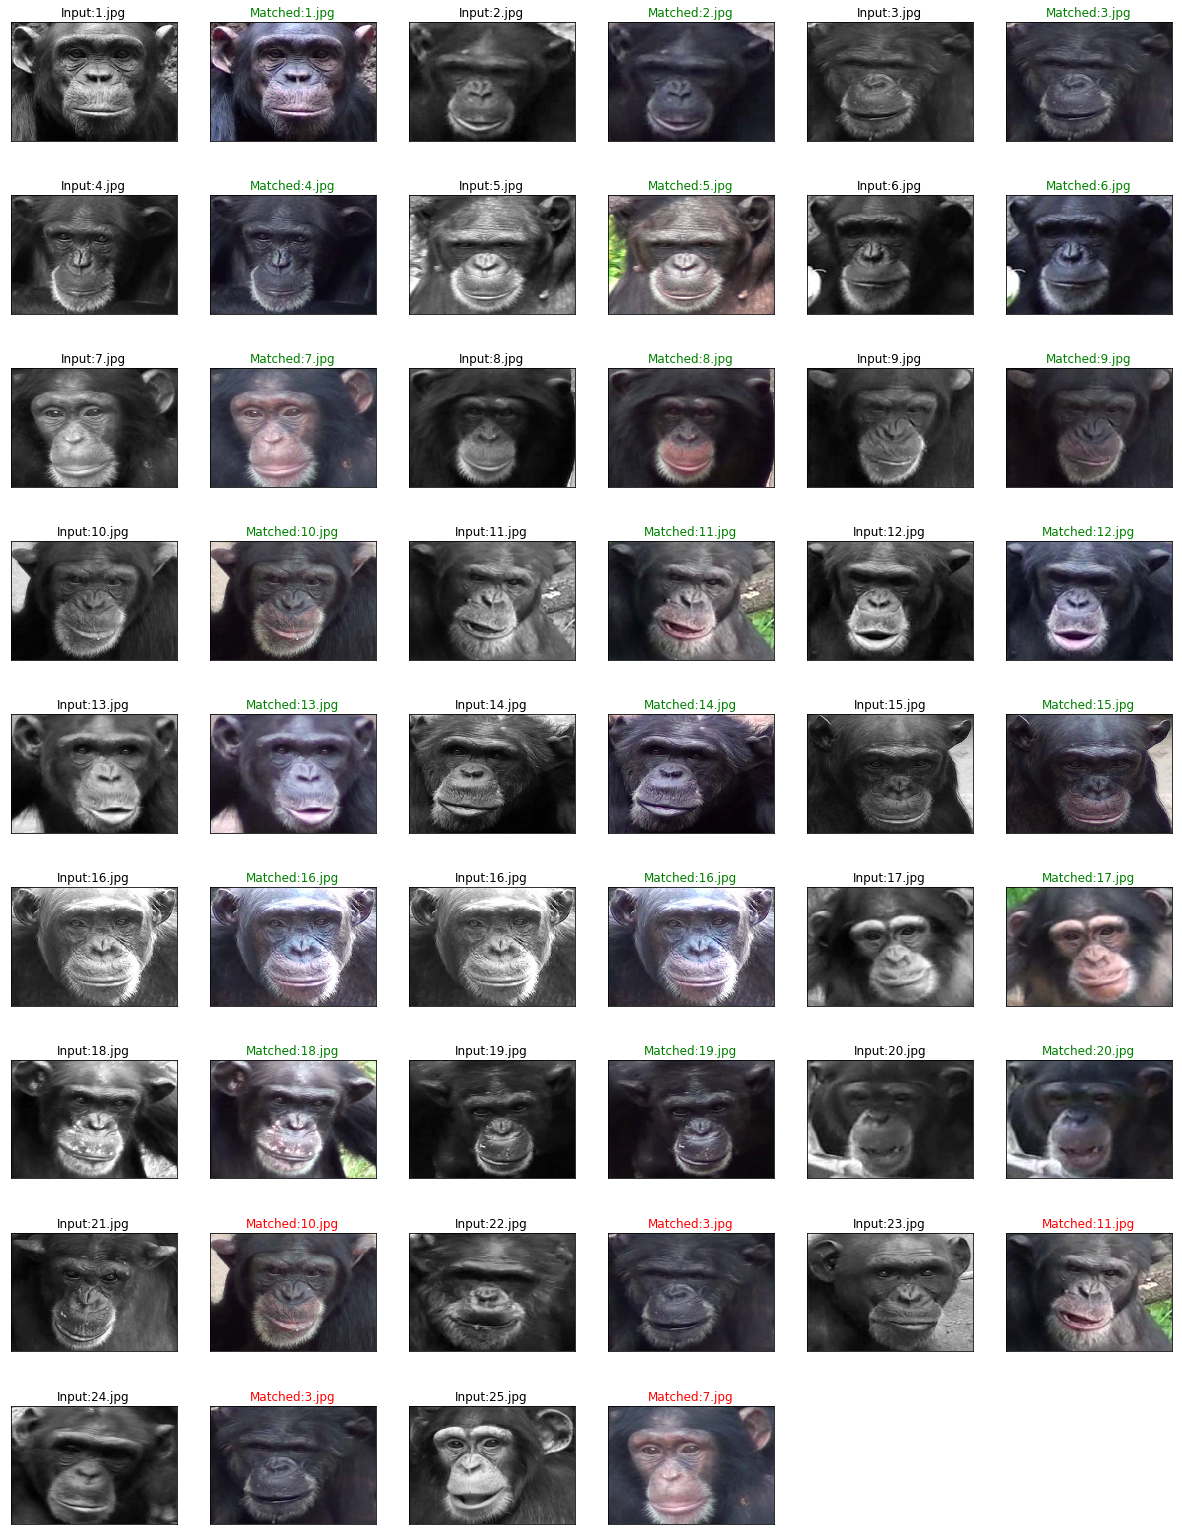

In [70]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred
    unknown_face        = io.imread(dataset_path + img, as_gray = True)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(15,6,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 5234
    
    t0 = 4800
    
    
    if norms[index] < t1:
        plt.subplot(15,6,1+count)
        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread('D:/Academia/Sem2/Advance Stats/t/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread('D:/Academia/Sem2/Advance Stats/t/'+train_image_names[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(15,6,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)
